In [2]:
import numpy as np
import pandas as pd 
import scipy as sp
import scipy.io
from scipy.stats import norm
from scipy.stats import multivariate_normal
from scipy.signal import find_peaks
from datetime import datetime


import matplotlib.pyplot as plt
import matplotlib.colors as mcolors



import os
import glob
import fnmatch
import re


## Read Arapuca run log

In [3]:
df_Xerunlist = pd.read_csv('./XeArapucaRunList.csv', sep = ';')
df_Xerunlist_info = df_Xerunlist[['Run Number', 'Day/time', 'Efield']]
df_Xerunlist_info['Day/time'] = pd.to_datetime(df_Xerunlist_info['Day/time'], format='%d/%m/%Y')
df_Xerunlist_info['Day/time'] = df_Xerunlist_info['Day/time'].dt.strftime('%d %b')
df_Xerunlist_info.head()



,Run Number,Day/time,Efield
0,10872,06 Feb,False
1,10873,06 Feb,False
2,10874,06 Feb,False
3,10875,06 Feb,False
4,10877,06 Feb,False


## Read my files and do the analysis


In [4]:
def readfile_list(filename_list):       
    
    def read_single_file(f):
        #load the file as a np array
        #data = pd.read_csv(f, header=0, usecols=[1,2] , names = ['Run number', 'Integral'])
        data = pd.read_csv(f, index_col=0)
        return data
    
    data_list = [read_single_file(f) for f in filename_list]
    return pd.concat(data_list, axis=0)

In [5]:
# read APA 6 files 

base_path_mod603 = '/Users/bordoni/protoDUNE/XeDoping/Arapuca/fnal_results/infiles08052020_mod603'
file_path_mod603 = os.path.join(base_path_mod603,'CalibratedIntegral_*.csv')

file_name_list_mod603 =  glob.glob(file_path_mod603) 
print(' Getting infos from ', len(file_name_list_mod603), 'runs ')



# read APA 3 files 

base_path_mod304 = '/Users/bordoni/protoDUNE/XeDoping/Arapuca/fnal_results/infiles08052020_mod304'
file_path_mod304 = os.path.join(base_path_mod304,'CalibratedIntegral_*.csv')

file_name_list_mod304 =  glob.glob(file_path_mod304) 
print(' Getting infos from ', len(file_name_list_mod304), 'runs ')# read APA 3 files 



Getting infos from  51 runs 
 Getting infos from  74 runs 


In [6]:
df_603 = readfile_list(file_name_list_mod603)
df_304 = readfile_list(file_name_list_mod304)

df_603.rename(columns={'Run number': 'Run Number'}, inplace=True)
df_304.rename(columns={'Run number': 'Run Number'}, inplace=True)

display(df_603.head())
display(df_304.head())


,Run Number,Ch,Integral,pe area_mean,pe area_std,f_cal,n good evts
0,11021,0,5534.322105,438.797034,144.886754,1.000000,6804
1,11021,1,14117.131841,450.359705,152.530278,1.026351,2504
2,11021,2,13022.030469,448.850498,143.627997,1.022911,2385
3,11021,3,15045.207965,415.431604,156.352321,0.946751,2247
4,11021,4,7202.065870,444.835992,145.092221,1.013763,6747


,Run Number,Ch,Integral,pe area_mean,pe area_std,f_cal,n good evts
0,11021,0,7554.093236,475.629607,164.225912,1.000000,10620
1,11021,1,5965.158716,473.798684,163.436650,0.996151,10694
2,11021,2,6811.382174,478.290037,163.970221,1.005593,10659
3,11021,3,5707.479941,491.526595,165.134200,1.033423,10700
4,11021,4,13929.721287,477.829584,163.054736,1.004625,4830


In [7]:
df_SPEapa3 = pd.merge(df_Xerunlist_info, df_304, how = 'inner', on=['Run Number'])
df_SPEapa6 = pd.merge(df_Xerunlist_info, df_603, how = 'inner', on=['Run Number'])
df_SPEapa3.head()

,Run Number,Day/time,Efield,Ch,Integral,pe area_mean,pe area_std,f_cal,n good evts
0,10877,06 Feb,False,0,10718.507422,489.968068,159.806797,1.000000,3081
1,10877,06 Feb,False,1,10863.251386,472.398410,158.004998,0.964141,3098
2,10877,06 Feb,False,2,9009.754344,488.991947,156.059397,0.998008,3347
3,10877,06 Feb,False,3,9480.714219,494.233581,160.738243,1.008706,2058
4,10877,06 Feb,False,4,13606.298940,482.778255,156.120687,0.985326,2662


# Plots for APA 6

Text(0.5, 1.0, 'Single p.e. mean area per Run and Channel')

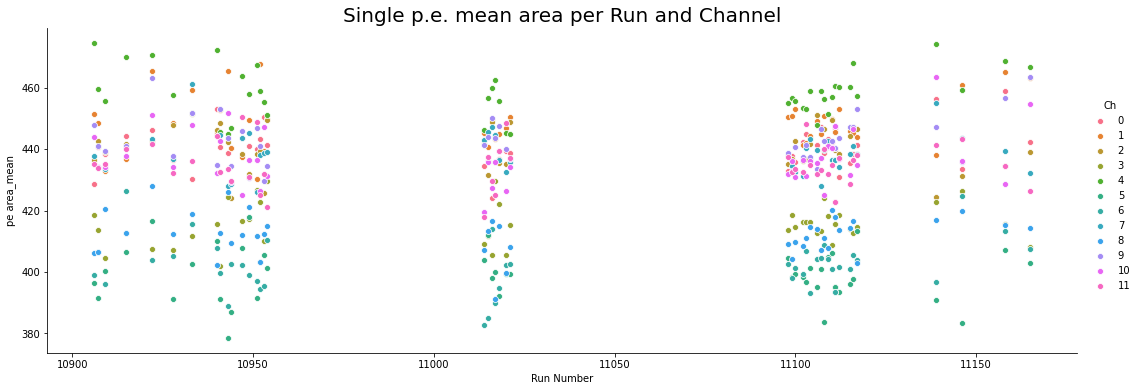

In [8]:
import seaborn as sns

b = sns.pairplot(x_vars=['Run Number'], y_vars=['pe area_mean'], data=df_SPEapa6, hue='Ch',  height=5, aspect=3)
plt.title('Single p.e. mean area per Run and Channel', fontsize =20)

#plt.xlabel(fontsize=16)

<Figure size 1296x720 with 0 Axes>

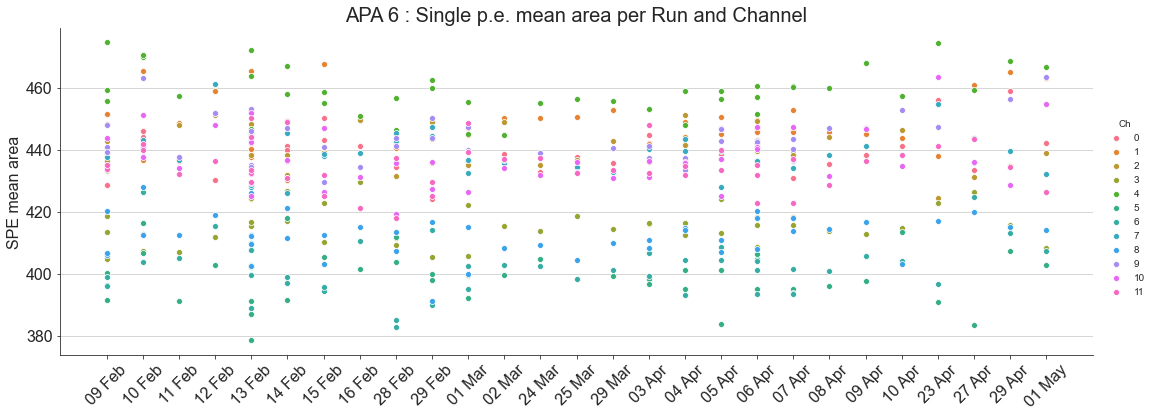

In [13]:
plt.figure(figsize=(18,10))

fig = sns.pairplot(x_vars=['Day/time'], y_vars=['pe area_mean'], data=df_SPEapa6, hue='Ch',  height=5, aspect=3)

plt.title('APA 6 : Single p.e. mean area per Run and Channel', fontsize =20)

plt.ylabel('SPE mean area',fontsize=16)
plt.xlabel('')
plt.yticks( fontsize=16)

plt.xticks(rotation=45, fontsize=16)
plt.grid(axis = 'y')
#plt.legend(fontsize=16)
plt.show()
fig.savefig('./singlepe_meanarea_apa6.pdf')

<Figure size 1296x720 with 0 Axes>

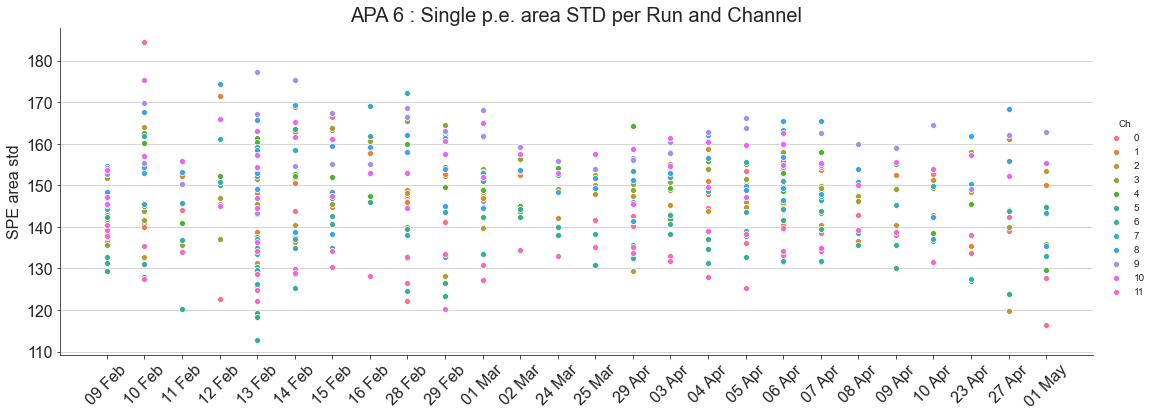

In [76]:
plt.figure(figsize=(18,10))

b = sns.pairplot(x_vars=['Day/time'], y_vars=['pe area_std'], data=df_SPEapa6, hue='Ch',  height=5, aspect=3)
plt.title('APA 6 : Single p.e. area STD per Run and Channel', fontsize =20)

plt.ylabel('SPE area std',fontsize=16)
plt.xlabel('')
plt.yticks( fontsize=16)
plt.grid(axis = 'y')

plt.xticks(rotation=45, fontsize=16)
#plt.legend(fontsize=16)
plt.show()

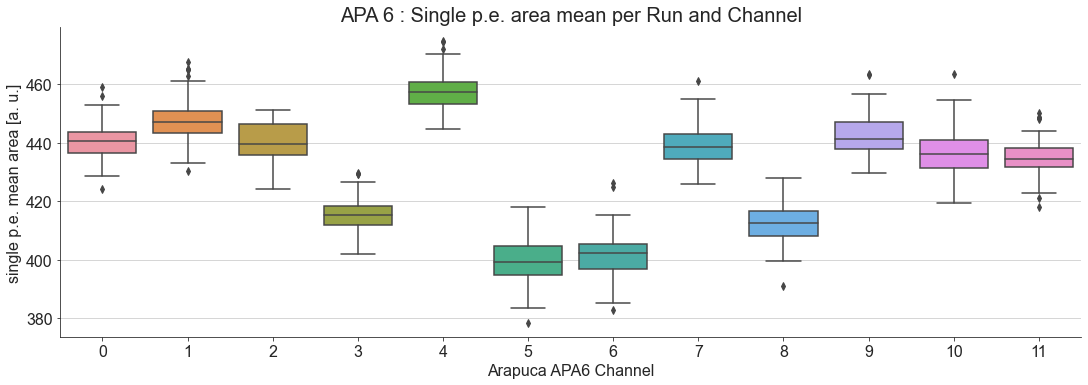

In [11]:
sns.set_style("whitegrid")
sns.set_style("ticks")
fig = sns.catplot(x='Ch', y="pe area_mean", kind="box", data=df_SPEapa6, height=5, aspect=3)

plt.title('APA 6 : Single p.e. area mean per Run and Channel', fontsize =20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Arapuca APA6 Channel', fontsize=16)
plt.ylabel('single p.e. mean area [a. u.]', fontsize=16)
plt.grid(axis ='y')

plt.show()
fig.savefig('./singlepe_meanarea_apa6_boxplot.pdf')

# Plots for APA 3

<Figure size 1296x720 with 0 Axes>

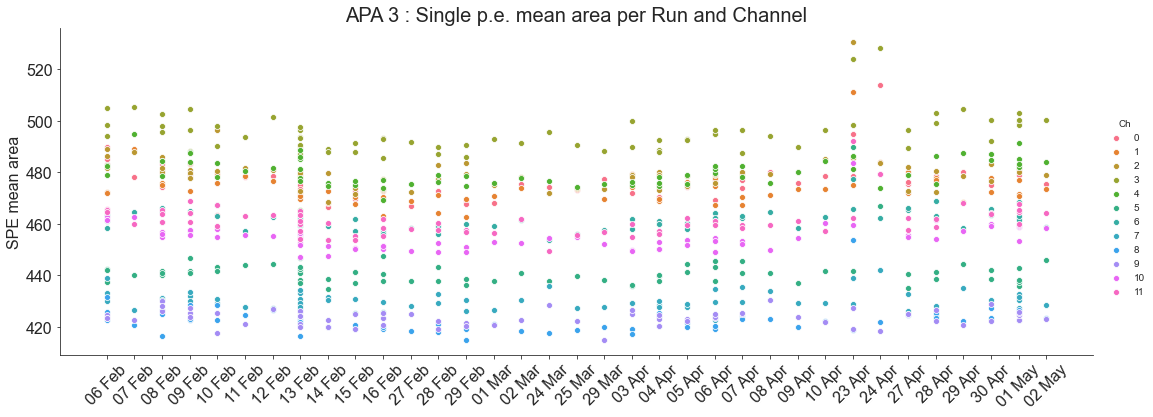

In [14]:
plt.figure(figsize=(18,10))

fig = sns.pairplot(x_vars=['Day/time'], y_vars=['pe area_mean'], data=df_SPEapa3, hue='Ch',  height=5, aspect=3)
plt.title('APA 3 : Single p.e. mean area per Run and Channel', fontsize =20)

plt.ylabel('SPE mean area',fontsize=16)
plt.xlabel('')
plt.yticks( fontsize=16)

plt.xticks(rotation=45, fontsize=16)
#plt.legend(fontsize=16)
plt.show()
fig.savefig('./singlepe_meanarea_apa3.pdf')


<Figure size 1296x720 with 0 Axes>

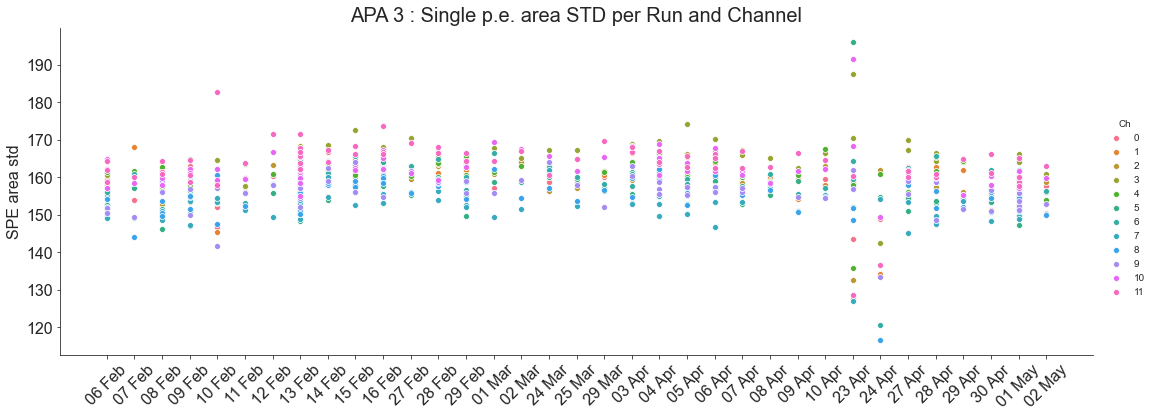

In [16]:
plt.figure(figsize=(18,10))

b = sns.pairplot(x_vars=['Day/time'], y_vars=['pe area_std'], data=df_SPEapa3, hue='Ch',  height=5, aspect=3)
plt.title('APA 3 : Single p.e. area STD per Run and Channel', fontsize =20)

plt.ylabel('SPE area std',fontsize=16)
plt.xlabel('')
plt.yticks( fontsize=16)

plt.xticks(rotation=45, fontsize=16)
#plt.legend(fontsize=16)
plt.show()

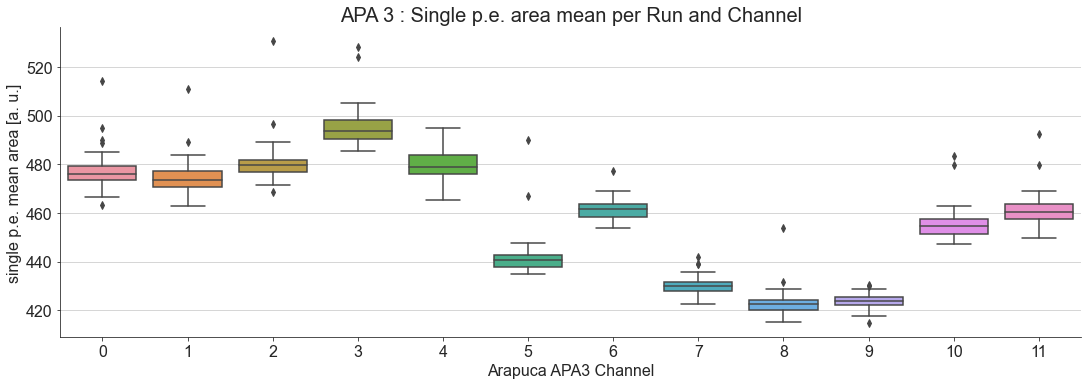

In [15]:
sns.set_style("whitegrid")
sns.set_style("ticks")
fig = sns.catplot(x='Ch', y="pe area_mean", kind="box", data=df_SPEapa3, height=5, aspect=3)

plt.title('APA 3 : Single p.e. area mean per Run and Channel', fontsize =20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Arapuca APA3 Channel', fontsize=16)
plt.ylabel('single p.e. mean area [a. u.]', fontsize=16)
plt.grid(axis ='y')

plt.show()
fig.savefig('./singlepe_meanarea_apa3_boxplot.pdf')

#sns.catplot(x='Ch', y="pe area_mean", kind="box", data=df_SPEapa3, height=6, aspect=3)

